In [1]:
# ref detector: https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49
# ref rotation: https://www.kaggle.com/code/gpiosenka/align-crop-resize-save-images-using-mtcnn

import os
import sys

sys.path.append('../tflow/mtcnn')
# ref: https://github.com/ipazc/mtcnn

import cv2
import numpy as np
from tqdm import tqdm
from utils import load_image
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from imutils.paths import list_images

In [2]:
# dataset = '/home/choppy/TOC/datasets/symdd/m15k_t' # morphing
# dataset = '/home/choppy/TOC/datasets/symdd/os25k_bf_t' # bonafide

dst_dataset = 'cropped-dataset'

images = [*list_images(dataset)]
len(images)

0

In [3]:
# check if it works
image_path = images[19]
img = load_image(image_path)
detector = MTCNN()
detections = detector.detect_faces(img)
detections

IndexError: list index out of range

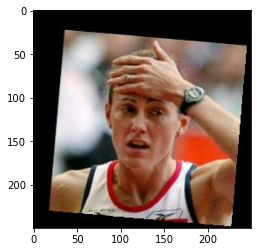

In [4]:
plt.imshow(img)

In [5]:
image_path

'/home/choppy/TOC/datasets/LFW/archive/lfw-deepfunneled/lfw-deepfunneled/Hayley_Tullett/Hayley_Tullett_0002.jpg'

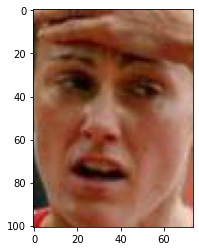

In [6]:
bbox = detections[0].get('box')
face = img[ bbox[1]: bbox[1] + bbox[3], bbox[0]: bbox[0] + bbox[2] ]
plt.imshow(face)

In [16]:
os.makedirs(dst_dataset, exist_ok=True)

no_detections = []

for imdir in tqdm(images):
    img = load_image(imdir)
    detections = detector.detect_faces(img)
    
    if detections:
        
        # get first detection
        detections = detections[0]
        
        # get predicted bounding box
        bbox = detections.get('box')
        
        # crop face image
        face = image[ bbox[1]: bbox[1] + bbox[3], bbox[0]: bbox[0] + bbox[2] ]
        
        # get subfolders info from image filedir
        name_info = imdir.split(dataset)[-1][1:]
        name_info_dirname = os.path.dirname(name_info)
        os.makedirs(os.path.join(dst_dataset, name_info_dirname), exist_ok=True)
        
        # change to bgr
        face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(dst_dataset, name_info), face)
    
    else:
        print(f'no detections for {imdir}')
        no_detections.append(imdir)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13233/13233 [1:05:59<00:00,  3.34it/s]


In [ ]:
print(f'Number of no detections: {len(no_detections)}')